In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Data aquisition
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/CaseStudy/Advertising.csv', index_col=0) 
print('Data Shape:', data.shape)
data.head()

Data Shape: (200, 4)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
#Data description and pre-processing
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
import pandas_profiling as pp

In [7]:
profile = pp.ProfileReport(data)

In [8]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


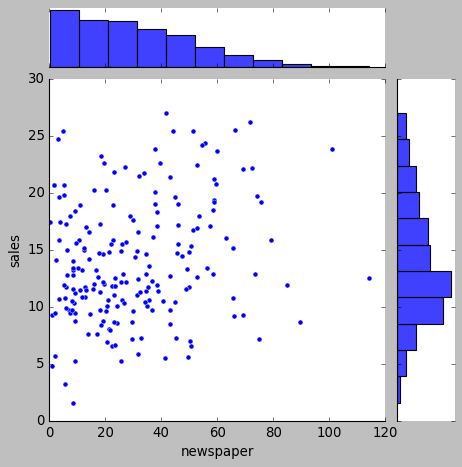

In [9]:
#Exploratory Data analysis
plt.style.use("classic")
sns.jointplot('newspaper','sales', data=data)
plt.show()

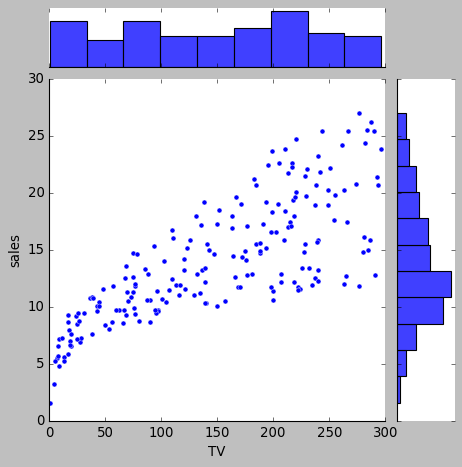

In [10]:
plt.style.use("classic")
sns.jointplot('TV','sales', data=data)
plt.show()

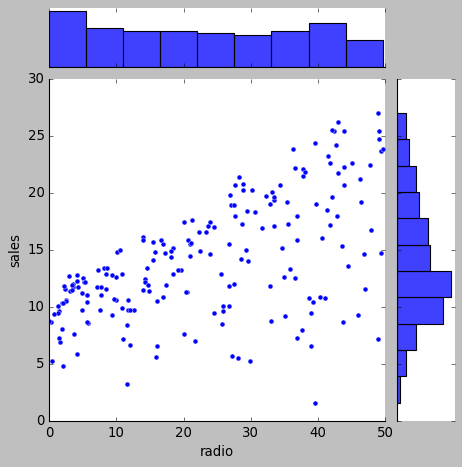

In [11]:
plt.style.use("classic")
sns.jointplot('radio','sales', data=data)
plt.show()

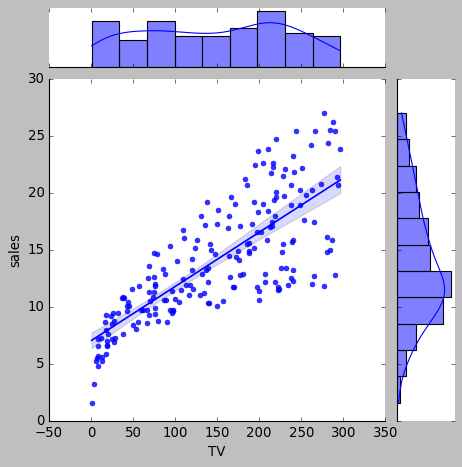

In [12]:
plt.style.use("classic")
sns.jointplot('TV','sales',data=data, kind="reg")
plt.show()

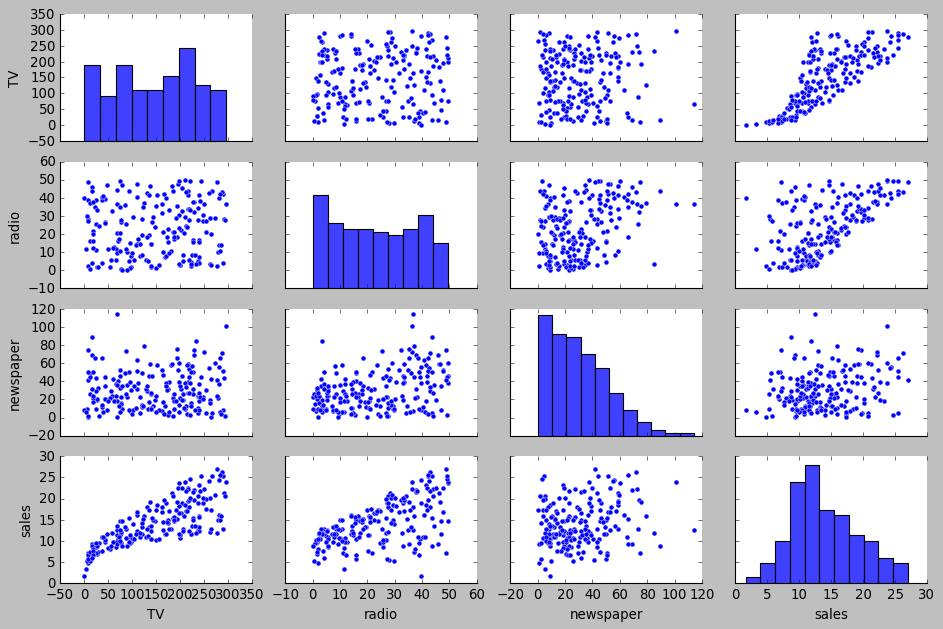

In [13]:
sns.pairplot(data,size = 2, aspect= 1.5)
plt.show()

<AxesSubplot:>

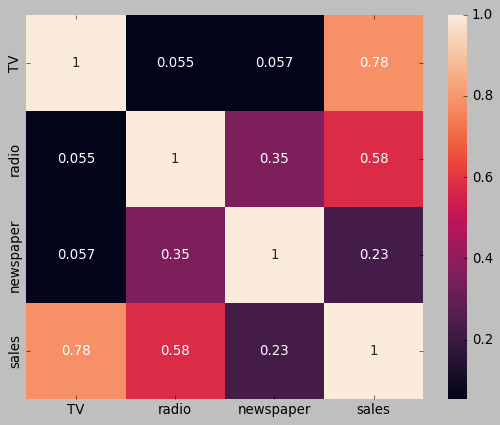

In [14]:
sns.heatmap(data.corr(), annot=True)

In [15]:
'''
1. Better relation ship between TV and sales with 0.78
2. Weak relationship between radio, with sales 0.58
3. very weak relation or no relation between newspaper with sales 
4. correlation can process between +1 to -1 +1 means strong relation ship and -1 means very weak relation ship
5. here in the data, TV and sales are correlation of 0.78 out of all independent variables hence TV and sales are most probable candidate for model building
''' 

'\n1. Better relation ship between TV and sales with 0.78\n2. Weak relationship between radio, with sales 0.58\n3. very weak relation or no relation between newspaper with sales \n4. correlation can process between +1 to -1 +1 means strong relation ship and -1 means very weak relation ship\n5. here in the data, TV and sales are correlation of 0.78 out of all independent variables hence TV and sales are most probable candidate for model building\n'

In [16]:
feature_cols = ['TV', 'newspaper', 'radio']
X = data[feature_cols]
X.head()

,TV,newspaper,radio
1,230.1,69.2,37.8
2,44.5,45.1,39.3
3,17.2,69.3,45.9
4,151.5,58.5,41.3
5,180.8,58.4,10.8


In [17]:
y = data.sales

In [18]:
y

1      22.1
2      10.4
3       9.3
4      18.5
5      12.9
       ... 
196     7.6
197     9.7
198    12.8
199    25.5
200    13.4
Name: sales, Length: 200, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.40,random_state=100)

In [20]:
print('X Train share:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

X Train share: (120, 3)
X test shape: (80, 3)
y train shape: (120,)
y test shape: (80,)


In [21]:
#standardisation 
# Variable that zre measured at different scales do not contribute to the model building and hence we will endup with bias
# to deal with this scenario, we will use standardisation method before model fitting
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[feature_cols] = sc.fit_transform(X_train[feature_cols])
X_test[feature_cols] = sc.transform(X_test[feature_cols])

In [22]:
X_train.describe()

,TV,newspaper,radio
count,1.200000e+02,1.200000e+02,1.200000e+02
mean,1.609823e-16,1.517305e-16,2.164935e-16
std,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.542459e+00,-1.380177e+00,-1.529016e+00
25%,-9.025325e-01,-7.079875e-01,-8.370190e-01
50%,-3.415395e-02,-2.828611e-01,5.694908e-02
75%,9.437238e-01,6.241493e-01,8.797308e-01
max,1.563431e+00,3.681275e+00,1.735622e+00


In [23]:
X_test.describe()

,TV,newspaper,radio
count,80.000000,80.000000,80.000000
mean,-0.013370,-0.083486,-0.020859
std,0.727547,0.918923,0.956859
min,-1.467884,-1.353467,-1.548882
25%,-0.625240,-0.847100,-0.982703
50%,0.104493,-0.211636,-0.111912
75%,0.670370,0.554037,0.811855
max,1.063464,2.586185,1.695891


In [24]:
# Model Developement and Evaluation
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
lr

LinearRegression()

In [26]:
y = lr.coef_

In [27]:
c = lr.intercept_

In [28]:
y

array([4.39916538, 0.19301082, 2.77809944])

In [29]:
c

13.941666666666665

In [30]:
feature_cols

['TV', 'newspaper', 'radio']

In [31]:
feature_cols.insert(0,'Intercept')

In [33]:
feature_cols

['Intercept', 'TV', 'newspaper', 'radio']

In [34]:
coef = lr.coef_.tolist()

In [35]:
coef

[4.399165383140398, 0.19301082209365725, 2.7780994375349395]

In [36]:
coef.insert(0, lr.intercept_)

In [37]:
coef

[13.941666666666665,
 4.399165383140398,
 0.19301082209365725,
 2.7780994375349395]

In [38]:
eq1 = zip(feature_cols, coef)
for c1,c2 in eq1:
    print(c1,c2)

Intercept 13.941666666666665
TV 4.399165383140398
newspaper 0.19301082209365725
radio 2.7780994375349395


In [39]:
#Using the model for predictions
y_pred_train = lr.predict(X_train)

In [40]:
y_pred_test = lr.predict(X_test)

In [41]:
y_pred_train

array([10.67499071, 13.39731167, 23.79242314, 14.40810507, 15.05253832,
       19.17374177,  6.35639974, 18.45536092, 16.81815687, 24.36834341,
        8.98802526, 20.2974432 , 15.82886751, 15.4840581 , 11.44473445,
       20.12519306, 15.51104254, 14.66148382, 16.38543431, 12.444436  ,
       16.43499222, 16.81145619, 24.70156579, 12.65155201, 16.69516593,
        9.18169327, 17.69346462, 13.91900161, 13.47773019, 21.34579923,
       15.96402347,  6.51301458, 10.26917174, 17.54091499, 11.98784668,
       18.50626169,  4.29475632, 18.39712249, 15.07124088, 16.36525329,
       20.61792772, 21.22947114,  5.84297178,  8.07885718, 18.0166288 ,
        9.54061407, 10.52844191, 12.59417852, 22.98508822, 13.88418134,
        9.92158024,  7.30129153, 11.92159987, 17.71348164, 15.70885175,
       12.19457828,  9.46153736, 20.73249776,  8.38271693, 10.48165701,
       18.67490703, 18.35590317, 15.32707344, 21.66321612,  5.98584211,
        8.51702642, 10.02689456, 23.31890691,  9.67790076,  9.75

In [42]:
y_pred_test

array([10.50329323, 19.91386212, 16.86475008, 19.2808446 , 20.91005495,
       13.23072728, 11.83450811, 12.3768918 , 20.5626061 , 20.87927124,
       10.71798713, 19.73592454,  6.45247553, 15.19278732,  8.97442278,
        7.87557064, 16.06973654, 12.15362537, 16.94017658, 11.3012604 ,
       16.92199144,  9.8485549 , 20.81033113, 17.20741603, 15.1477918 ,
       21.77300906, 19.25844936, 10.04497568, 19.18617976, 14.71166143,
       14.20474595,  7.45874606, 10.10662636, 14.80694717,  7.15429933,
       13.48480102,  7.57687433, 11.74921581, 13.56628468, 15.42846987,
       17.34128338, 13.52408003, 14.40501595, 13.87687533, 11.81130814,
        8.82460743, 12.14017924, 19.23032281,  9.10806704,  5.11621039,
       16.28266865, 18.09442734, 12.91358411, 16.7315997 , 17.79451175,
       12.22540987,  4.37239368, 10.98931816, 16.09071955, 13.52133471,
       17.05048947, 17.65259323, 20.48949082, 14.65325662,  9.73877067,
        6.33669758, 14.70354796, 11.95369732,  6.58333009, 14.97

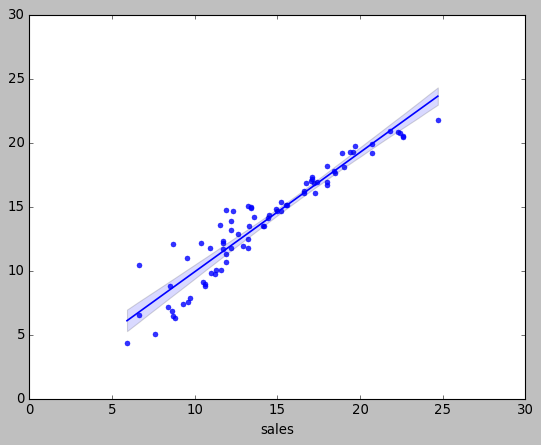

In [43]:
plt.style.use("classic")
sns.regplot(y_test,y_pred_test)
plt.show()

In [44]:
# Model evaluation using metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
print(mean_absolute_error(y_train,y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))

1.4473195180327114
1.098983350216892


In [45]:
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)

In [46]:
RMSE_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(RMSE_train, RMSE_test)

1.857458779861196 1.3895619448095555


In [47]:
# Model evaluation using r squared and adjusted r squared
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print(r2_train, r2_test)

0.8946660631748259 0.8959553587915503


In [48]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [49]:
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

Adjusted R2 score for training set is 0.8919419096362438
Adjusted R2 score for test set is 0.8918483334806905


In [50]:
'''
Observation :

1) R squared and adjusted r squared values for the training set is observed to be 0.9005511298841222 and 0.8979791763466426
2) R squared and adjusted r squared values for the test data set is ibserved to be 0.8876696235952205 and 0.8832355297897687
'''


'\nObservation :\n\n1) R squared and adjusted r squared values for the training set is observed to be 0.9005511298841222 and 0.8979791763466426\n2) R squared and adjusted r squared values for the test data set is ibserved to be 0.8876696235952205 and 0.8832355297897687\n'

In [51]:
#Feature selection
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

In [52]:
X.columns

Index(['TV', 'radio'], dtype='object')

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40, random_state=100)

In [54]:
X_train

,TV,radio
13,23.8,35.1
17,67.8,36.6
102,296.4,36.3
121,141.3,26.8
46,175.1,22.5
...,...,...
88,110.7,40.6
104,187.9,17.2
68,139.3,14.5
25,62.3,12.6


In [55]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
lr2.fit(X_train,y_train)

LinearRegression()

In [56]:
y_pred_train = lr2.predict(X_train)
y_pred_test = lr2.predict(X_test)

In [57]:
y_pred_train

array([10.42417446, 12.74877121, 23.29142606, 14.2984208 , 15.05023825,
       19.18431307,  6.35889974, 18.47178538, 16.96779794, 24.15389235,
        9.14042601, 20.38538644, 15.49032027, 15.49592437, 11.55060823,
       20.30665239, 15.51837487, 14.63941361, 16.19547189, 12.42194044,
       16.45506499, 16.92115905, 24.77655974, 12.5167537 , 16.6996271 ,
        9.29174776, 17.85698133, 14.02670711, 13.50610147, 21.25473109,
       15.93069046,  6.29185291, 10.20445902, 17.57206253, 12.28989868,
       18.77240391,  4.24324469, 18.31582691, 15.16518063, 16.22870658,
       20.71808254, 21.53080982,  5.82629176,  8.21343446, 18.3631076 ,
        9.62972238, 10.46752237, 12.34087565, 23.34579245, 13.8509814 ,
        9.85706577,  7.3850344 , 11.69527765, 17.69902596, 15.51124353,
       12.23941832,  9.53035325, 20.50172022,  8.58496   , 10.62467425,
       18.88704766, 18.56157309, 15.26737822, 21.61212869,  5.90981597,
        8.62670808, 10.16506037, 23.22168552,  9.76069832,  9.72

In [58]:
y_pred_test

array([10.40287997, 20.21360175, 16.841016  , 19.11137286, 21.07750509,
       13.23953982, 11.83071817, 12.49059646, 20.60603296, 21.04175818,
       10.88649029, 19.43095404,  6.35145217, 15.37362461,  8.94555727,
        7.96170471, 16.35661869, 12.03552911, 17.22403792, 11.19910292,
       17.17081931,  9.7455315 , 20.7700808 , 17.20526501, 15.22019707,
       22.17113865, 19.20874399, 10.00561296, 19.56264438, 14.93362454,
       14.27464104,  7.62760786,  9.86803859, 14.83256538,  7.18277198,
       13.65634804,  7.45607615, 11.81932958, 13.62154046, 15.11201591,
       17.12742574, 13.73171028, 14.25534346, 13.81996141, 11.95476185,
        8.70118489, 11.73502882, 19.33978317,  8.97229307,  5.13758946,
       16.28277434, 18.13561902, 12.78384936, 16.85949964, 18.02829635,
       12.18040696,  4.23972879, 11.24717885, 16.24520156, 13.42704294,
       17.22431785, 17.52095082, 20.722177  , 14.84667462,  9.82102958,
        6.3833939 , 14.56106838, 11.59444451,  6.59829223, 14.68

In [59]:
print(mean_squared_error(y_train,y_pred_train))

3.4797002004399387


In [60]:
print(mean_squared_error(y_test, y_pred_test))

1.7917334982368476


In [61]:
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(np.sqrt(mean_squared_error(y_test, y_pred_test)))

1.8653954541704927
1.3385564979622069


In [62]:
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print("R2 score for training is :", r2_train)
print("R2 score for test is :", r2_test)

R2 score for training is : 0.8937639842482397
R2 score for test is : 0.9034533283261509


In [63]:
#adjusted R2
adj_r2_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training dataset is :", adj_r2_train)
print("adjusted R2 score for test dataset is :", adj_r2_test)

Adjusted R2 score for training dataset is : 0.8919479839789788
adjusted R2 score for test dataset is : 0.9009456225683886
